In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
from keras.optimizers.legacy import Adam

In [3]:
# 0 - Angry
# 1 - Disgust
# 2 - Fear
# 3 - Happy
# 4 - Sad
# 5 - Surprise
# 6 - Neutral
datasets = ['test', 'train', 'val']
moods = {"0": "Angry", "1": "Disgust", "2": "Fear", "3": "Happy", "4": "Sad", "5": "Surprise", "6": "Neutral"}

In [4]:
x_train = []
y_train = []
for directory in datasets:
    for key in moods.keys():
        mood = int(key)
        path = f'./{directory}/{key}/'
        print(path)
        onlyfiles = [f for f in os.listdir(path)]
        for file in onlyfiles:
            x_train.append(cv2.imread(path+file, 0))
            y_train.append(mood)
for i in range(len(x_train)):
    r = random.randint(0, len(x_train) - 1)
    x_train[i], x_train[r] = x_train[r], x_train[i]
    y_train[i], y_train[r] = y_train[r], y_train[i]
    

./test/0/
./test/1/
./test/2/
./test/3/
./test/4/
./test/5/
./test/6/
./train/0/
./train/1/
./train/2/
./train/3/
./train/4/
./train/5/
./train/6/
./val/0/
./val/1/
./val/2/
./val/3/
./val/4/
./val/5/
./val/6/


In [5]:
x_train = np.array(x_train) / 255
y_train = np.array(y_train)

In [6]:
y_train = keras.utils.to_categorical(y_train, len(moods.keys()))

In [7]:
x_train.shape

(35887, 48, 48)

In [8]:
y_train.shape

(35887, 7)

In [9]:
model = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(len(moods.keys()), activation='softmax')
])

2024-02-26 21:31:11.661439: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 21:31:11.775271: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 21:31:11.775318: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 21:31:11.777032: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 21:31:11.777069: I external/local_xla/xla/stream_executor

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              loss=['categorical_crossentropy'],
              metrics=['accuracy'])

In [11]:
his = model.fit(x_train, y_train, batch_size=32, epochs=60, validation_split=0.2)

Epoch 1/60


2024-02-26 21:31:12.903091: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-02-26 21:31:12.985497: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-26 21:31:13.148125: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-26 21:31:13.526495: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


898/898 [==============================] - 22s 21ms/step - loss: 1.7211 - accuracy: 0.3674 - val_loss: 1.4813 - val_accuracy: 0.4337
Epoch 2/60
898/898 [==============================] - 18s 20ms/step - loss: 1.3656 - accuracy: 0.4750 - val_loss: 1.3567 - val_accuracy: 0.4787
Epoch 3/60
898/898 [==============================] - 18s 20ms/step - loss: 1.1775 - accuracy: 0.5570 - val_loss: 1.2733 - val_accuracy: 0.5320
Epoch 4/60
898/898 [==============================] - 18s 20ms/step - loss: 0.9655 - accuracy: 0.6439 - val_loss: 1.3078 - val_accuracy: 0.5369
Epoch 5/60
898/898 [==============================] - 18s 20ms/step - loss: 0.6850 - accuracy: 0.7549 - val_loss: 1.2928 - val_accuracy: 0.5702
Epoch 6/60
898/898 [==============================] - 18s 20ms/step - loss: 0.4001 - accuracy: 0.8682 - val_loss: 1.4328 - val_accuracy: 0.5745
Epoch 7/60
898/898 [==============================] - 19s 21ms/step - loss: 0.2115 - accuracy: 0.9373 - val_loss: 1.5863 - val_accuracy: 0.5830
Epo

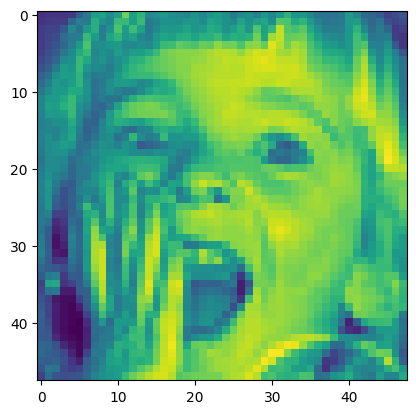

1/1 [==============================] - 0s 12ms/step
[3.438025331092831e-08, 2.5943763671122493e-15, 4.638305384219166e-08, 1.67799191208573e-10, 1.9414499521919204e-11, 0.9999998807907104, 1.166153653676949e-12]
5
Surprise
Surprise


In [17]:
index = 12005
test = x_train[index]
plt.imshow(test)
plt.show()
test = np.expand_dims(test, axis=0)
p = model.predict(test).tolist()[0]
print(p)
photo_mood = p.index(max(p))
val_mood = y_train[index].tolist()
y_mood = val_mood.index(max(val_mood))
print(photo_mood)
print(moods[str(photo_mood)])
print(moods[str(y_mood)])

In [13]:
model.save('./model_dir_1/model.tf')

INFO:tensorflow:Assets written to: ./model_dir_1/model.tf/assets


INFO:tensorflow:Assets written to: ./model_dir_1/model.tf/assets
